In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from ipyparallel import Client

sns.set_style("whitegrid")

In [2]:
def generate_data(N):
    return np.concatenate(
        (np.random.uniform(low=-1, size=(N, 2)),
         np.ones(N).reshape(N, 1)),
        axis=1)


def define_line():
    x = np.random.uniform(low=-1, size=(2, 2))
    m = (x[0][1] - x[1][1]) / (x[0][0] - x[1][0])
    coeff_vector = np.array([-m, 1, m*x[0][0] - x[0][1]])

    return coeff_vector


def create_dataframe(x, coeff_vector):
    df = pd.DataFrame(data=x, columns=['x1', 'x2', 'bias'])
    df['y'] = np.sign(df[['x1', 'x2', 'bias']].values @ coeff_vector)

    return df

In [3]:
x = generate_data(100)

In [4]:
g = define_line()

In [5]:
print(g)

[ 0.10402144  1.         -0.23143017]


In [6]:
df = create_dataframe(x, g)

(-1, 1)

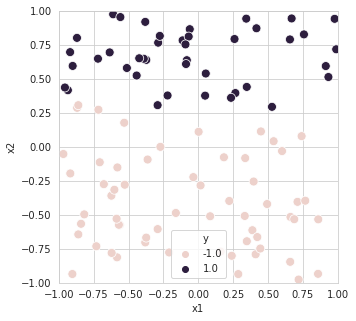

In [7]:
xx = np.linspace(-1, 1, 100)

plt.figure(figsize=(5, 5))
plt.ylim(-1, 1)
plt.xlim(-1, 1)

sns.scatterplot(x='x1', y='x2', data=df, hue='y', legend='full', s=80)
# sns.lineplot(xx, g(xx))
plt.ylim(-1, 1)
plt.xlim(-1, 1)

In [ ]:
def run_experiment(run_id, N):
    """
    Awesome function description goes here
    """
    import numpy as np
    import pandas as pd
    
###########################################
    def generate_data(N):
        return np.concatenate(
            (np.random.uniform(low=-1, size=(N, 2)),
             np.ones(N).reshape(N, 1)),
            axis=1)


    def define_line():
        x = np.random.uniform(low=-1, size=(2, 2))
        m = (x[0][1] - x[1][1]) / (x[0][0] - x[1][0])
        coeff_vector = np.array([-m, 1, m*x[0][0] - x[0][1]])

        return coeff_vector


    def create_dataframe(x, coeff_vector):
        df = pd.DataFrame(data=x, columns=['x1', 'x2', 'bias'])
        df['y'] = np.sign(df[['x1', 'x2', 'bias']].values @ coeff_vector)

        return df
###########################################

    x = generate_data(N)
    g = define_line()
    df = create_dataframe(x, g)
    
    X = df[['x1', 'x2', 'bias']].values
    y = df['y'].values
    N = X.shape[0]
    
    w_old = np.zeros(X.shape[1])
    w_new = np.ones(X.shape[1])
    
    lr = 0.01
    epoch = 0
    while np.linalg.norm(w_old - w_new) >= 0.01:
        
        X_y = np.concatenate((X, y), axis=1)
        np.random.shuffle(X_y)
        X = X_y[:, :-1]
        y = X_y[:, -1]
        
        num = X * y.reshape(y.shape[0], 1)
        den = 1 + np.exp(y * (X @ w_old))
        quotient = num / den.reshape(den.shape[0], 1)
        
        grad_E_in = - (1/N) * np.sum(quotient, axis=0)
        
        w_new = w_old - lr * grad_E_in